<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b>Clustering</b></p>

<hr style="height:5px;border:none" />

# 1. What is clustering?
<hr style="height:1px;border:none" />

A **clustering** algorithm identifies grouping (or clusters) of observations based on the proximity in a multi-dimensional space of features. There are different algorithms for clustering. Each has strengths and weaknesses depending on how observations are clustered. Here are some examples of clustering algorithms.

<img style="width: 650px; padding: 0px;" src="https://github.com/ellieshuojin/JupyterNotebook/blob/master/images/Cluster_ClusterExamples.png?raw=true" alt="Clustering algorithms examples"/>

As you can see, no algorithm works in all settings. Here is a list of different clustering algorithms available in `Scikit-learn`.

<img style="width: 700px; padding: 0px;" src="https://github.com/ellieshuojin/JupyterNotebook/blob/master/images/Cluster_Table.png?raw=true" alt="A table of clustering algorithms"/>

Rather than covering all clustering algorithms, the content below will focus on two popular approaches: *K-means clustering* and *hierarchical clustering*.

# 2. K-means clustering: Iris data
<hr style="height:1px;border:none" />

The **K-means** clustering algorithm produces $K$ clusters of similar sizes. This algorithm starts by choosing $K$ centroids in the feature space, defining the centers of $K$ clusters. Then it assigns each observation to a cluster by minimizing the distance between the observation and a centroid. 

To demonstrate K-means clustering, we apply the algorithm to the Iris data. 

## Data
As you recall, this data set consists of the lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). There are 150 observations (50 for each type of iris) with 4 features (sepal length, sepal width, petal length and petal width). This is one of the standard data sets available in `Scikit-learn`.


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Loading the iris data
iris = datasets.load_iris()
X = iris.data    # Data
y = iris.target  # Target i.e., true clusters
numClus = 3  # number of clusters

## Clustering
K-means clustering is available in **`sklearn.cluster`** as a transformation object **`KMeans`**. Here, the number of clusters **`n_clusters`** is a *required* parameter. We can use the **`.fit()`** method to fit the data, and cluster assignments can be found as the attribute **`.labels_`**. The coordinates for the centroids can be found as the attribute **`.cluster_centers_`**. 

In [3]:
# K-means clustering
km = KMeans(n_clusters=3)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates

Now, let's see how well the K-means algorithm worked.

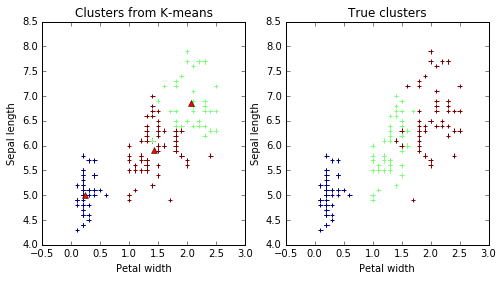

In [4]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'r^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()

# 3. K-means clustering: WISC data
<hr style="height:1px;border:none" />


## Data
The data set for this example, wiscsem.txt consists of the Weschler Intelligence Scale for Children (WISC) of 175 children. See the note on 
[factor analysis](https://github.com/ellieshuojin/JupyterNotebook/blob/master/FactorAnalysis.ipynb) for details. We are interested in seeing if there are any clusters of children with similar WISC outcomes. 

To do so, let's load the data first.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# loading the data
wiscData = pd.read_csv('wiscsem.txt', sep='\t')
wiscFeatures = np.array(wiscData.iloc[:,2:13])
featureNames = np.array(wiscData.columns[2:13])

## Dimension reduction by PCA

This is a 11-dimensional data set. But to increase computational efficiency, let's reduce the dimensionality of this data set by apply a PCA. First, let's fit a PCA and figure out the number of components with a Scree plot.

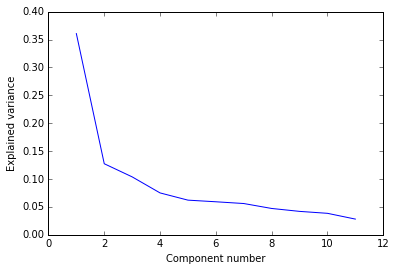

In [7]:
# applying PCA
pca = PCA()  # creating a PCA transformation object
wiscPCs = pca.fit_transform(wiscFeatures) # fit the data

# Squared error plot
plt.plot(np.arange(1,len(featureNames)+1), pca.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

It seems that the Scree plot elbows at 2. So we will use the first 2 PCs.

In [8]:
## We will use first two components
PC = wiscPCs[:,:2]

## How many clusters?
One shortcoming of the K-means algorithm is that you have to specify the number of clusters. But in some cases, you never know the number of clusters. What can we do in such a case? One way we can determine the number of clusters is to plot the sum of squared distances from cluster centroids, also known as the **inertia**. We can get the inertia by the attribute **`.inertia_`**. 

We run the K-means algorithm with different numbers of clusters, and calculate the corresponding inertiae. Then we plot the inertiae against the number of clusters. The inertia decreases as the number of clusters increases. However, there is an *elbow* in this plot where the rate of decrease slows down. In this particular example, we calculate the inertia up to 20 clusters.

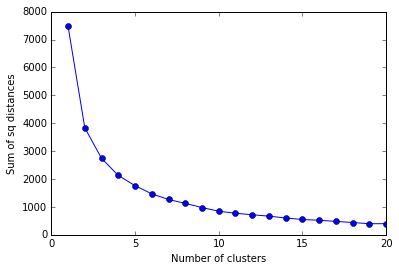

In [9]:
# determinging the number of clusters (up to 20 clusters)
SSE = []
for iClus in range(1,21):  
    # K-means clustering
    km = KMeans(n_clusters=iClus)  # K-means with a given number of clusters
    km.fit(PC)  # fitting the principal components
    SSE.append(km.inertia_) # recording the sum of square distances

# plotting the sum of square distance
plt.plot(np.arange(1,21),SSE,marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sq distances')
plt.show()


The selection of the elbow location is somewhat subjective. In this example, 3 clusters seem reasonable for this data set. So we will re-run K-means with 3 clusters.

In [10]:
## We will go with 3 clusters
# K-means clustering again
km = KMeans(n_clusters=3)  
km.fit(PC)  # fitting the principal components
y_clus = km.labels_   # clustering info resulting from K-means

Let's examine the resulting clusters.

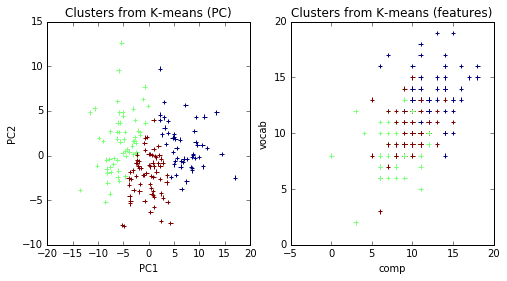

In [11]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, in PC space
plt.subplot(121)
plt.scatter(PC[:,0],PC[:,1],c=y_clus,marker='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters from K-means (PC)')

# with two of the features
plt.subplot(122)
plt.scatter(wiscFeatures[:,1],wiscFeatures[:,4],c=y_clus,marker='+')
plt.xlabel('comp')
plt.ylabel('vocab')
plt.title('Clusters from K-means (features)')
plt.show()

# 4. K-means clustering: Digit data
<hr style="height:1px;border:none" />

## Data

Recall the digit data from the [PCA note](https://github.com/ellieshuojin/JupyterNotebook/blob/master/PCA.ipynb). There are 10 different types of digits in the data set, so we would like to cluster observations into 10 different clusters. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# loading the digits data
digits = datasets.load_digits()
digitsX = digits.data    # the data, 1797 x 64 array
digitsImages = digits.images  # image data, 1797 x 8 x 8
digitsTargets = digits.target # target information
digitsFeatureNames = digits.target_names  # digits

## Dimension reduction with PCA

Since this data set is 64-dimensional, it is reasonable to reduce the dimensionality of the data with PCA. To determine the number of PCA components, we produce a Scree plot. 

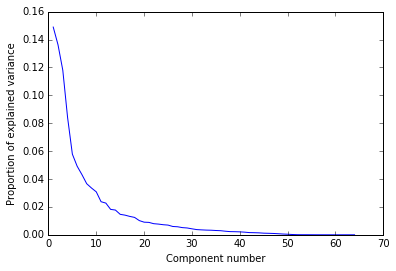

In [13]:
# PCA with all possible components
digitsPCA = PCA(n_components=64)
digitsPCs = digitsPCA.fit_transform(digitsX)

# plotting the explained variance ratio (a.k.a., Scree plot)
plt.plot(np.arange(1,65),digitsPCA.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Proportion of explained variance')
plt.show()

We can compare the results from K-means clustering to the true targets.

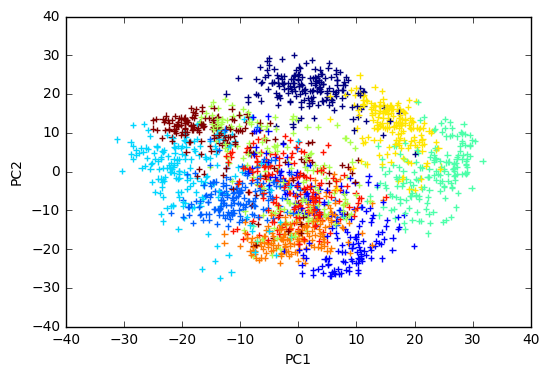

In [16]:
# plotting the PCs
plt.scatter(digitsPCs[:,0], digitsPCs[:,1], c=digitsTargets, marker='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 5. Hierarchical clustering
<hr style="height:1px;border:none" />

A **hierarchical clustering** algorithm starts out by treating each observation as a cluster of its own. Then you merge two closest clusters (in terms of the distance in the feature space) to form a new cluster. You keep merging clusters until there is a desired number of clusters. Here is a depiction of the hierarchical clustering algorithm by a diagram called a *dendrogram*. It shows which clusters are merged at what distance between them (on the X-axis). 

<img style="width: 500px; padding: 0px;" src="https://github.com/ellieshuojin/JupyterNotebook/blob/master/images//Cluster_Dendrogram.png?raw=true" alt="Dendrogram example"/>

There are different methods in merging clusters in hierarchical clustering. We will use the **Ward** method, which is the default in `Scikit-learn`.

Unlike K-means clustering which yields clusters of similar sizes, hierarchical clustering may produce clusters of heterogeneous sizes. 

## Example: Iris data
The hierarchical clustering algorithm is available as a transformation object **`AgglomerativeClustering`** under **`sklearn.cluster`**. The use of `AgglomerativeClustering` is similar to that of `KMeans` we saw earlier. Like `KMeans`, we need to provide the number of clusters as **`n_clusters`** as the input parameter. 

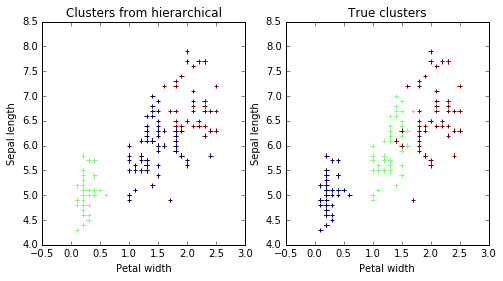

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets


# Loading the iris data
iris = datasets.load_iris()
X = iris.data    # Data
y = iris.target  # Target i.e., true clusters
numClus = 3  # number of clusters

# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3)  # defining the clustering object
hc.fit(X)  # actually fitting the data
y_clus = hc.labels_   # clustering info resulting from hieararchical

### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from hierarchical
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from hierarchical')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()

Now let's take a look at the cluster sizes resulting from the hierarchical clustering.

In [15]:
# Cluster sizes
# From hierarchical
cs_hc = [len(y_clus[y_clus==i]) for i in range(3)]
print(cs_hc)

[64, 50, 36]


In [16]:
# True target
cs_target = [len(y[y==i]) for i in range(3)]
print(cs_target)

[50, 50, 50]


# 6. Evaluating clustering performance
<hr style="height:1px;border:none" />

If you happen to have the information for the true clusters, then you can evaluate how accurate / inaccurate your clustering algorithm results are. A challenge here is that clusters may not be labeled the same in the target and clustering algorithm outcomes. For example, the *Setosa* cluster may be labeled with 0s in the target, but it may be labeled with 1s in the clustering algorithm results. Luckily, there are a number of metrics that can still evaluate the performance of clustering despite the difference in cluster labels. Here are two of those:

  * **Adjusted Rand index (ARI)**:
      * It summarizes the similarity between the cluster labels. 
      * Range: [-1, 1]. 
          * A negative ARI indicates a very bad match (independent labelings). 
          * An ARI close to 1 indicates highly similar clusters. 
          * ARI=1 indicates the perfect match.
  * **Adjusted mutual information (AMI)**:
      * It summarizes the agreement between the cluster labels. 
      * Range: [0, 1]. 
          * An AMI close to 0 indicates a very bad match (independent labelings). 
          * An AMI close to 1 indicates highly similar clusters. 
          * AMI=1 indicates the perfect match.

## Example
Let's compare the hierarchical clustering results from the iris data to the target.

In [17]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# True target, Iris data
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
              2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
              2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Hierarchical clustering, Iris data
y_cl = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
                 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
                 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Note here that the Setosa cluster is labeled with 0s in the target, whereas in the clustering results, it is labeled with 1s. 

In [18]:
print('ARI=',adjusted_rand_score(y, y_cl),sep='')

ARI=0.731198556771


In [19]:
print('AMI=',adjusted_mutual_info_score(y, y_cl),sep='')

AMI=0.757803422509


Although clustering results are not *bad*, the metrics did not reach close to 1. That means there are some discrepancies between the target and the clustering results.